# Combined Trade and Sentiment Data EDA 

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import os
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

## Load Merged Dataset

In [4]:
df = pd.read_csv("../data/Merged Data/merged_trades_sentiment.csv")

## Ensure numeric Cols

In [5]:
numeric_cols = ['Closed_PnL', "Size USD", "value"]
for col in numeric_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors = "coerce")

## Dataset Overview

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 31 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   account           211224 non-null  object 
 1   coin              211224 non-null  object 
 2   execution_price   211224 non-null  float64
 3   size_tokens       211224 non-null  float64
 4   size_usd          211224 non-null  float64
 5   side              211224 non-null  object 
 6   timestamp_local   211224 non-null  object 
 7   start_position    211224 non-null  float64
 8   direction         211224 non-null  object 
 9   closed_pnl        211224 non-null  float64
 10  transaction_hash  211224 non-null  object 
 11  order_id          211224 non-null  int64  
 12  crossed           211224 non-null  bool   
 13  fee               211224 non-null  float64
 14  trade_id          211224 non-null  float64
 15  timestamp_x       211224 non-null  float64
 16  timestamp_utc     21

In [7]:
df.describe()

,execution_price,size_tokens,size_usd,start_position,closed_pnl,order_id,fee,trade_id,timestamp_x,hour,weekday,week,year,is_weekend,win,abs_size_tokens,abs_size_usd,roi,value,sentiment_score
count,211224.000000,2.112240e+05,2.112240e+05,2.112240e+05,211224.000000,2.112240e+05,211224.000000,2.112240e+05,2.112240e+05,211224.000000,211224.000000,211224.000000,211224.000000,211224.000000,211224.000000,2.112240e+05,2.112240e+05,211224.000000,211224.000000,211224.000000
mean,11414.723350,4.623365e+03,5.639451e+03,-2.994625e+04,48.749001,6.965388e+10,1.163967,5.628549e+14,1.737744e+12,12.234500,2.551405,18.134142,2024.747978,0.192757,0.411265,4.623365e+03,5.639451e+03,0.018991,51.610044,52.948529
std,29447.654868,1.042729e+05,3.657514e+04,6.738074e+05,919.164828,1.835753e+10,6.758854,3.257565e+14,8.689920e+09,6.960365,1.921552,15.513679,0.437996,0.394465,0.492064,1.042729e+05,3.657514e+04,0.845727,20.981819,32.326780
min,0.000005,8.740000e-07,0.000000e+00,-1.433463e+07,-117990.104100,1.732711e+08,-1.175712,0.000000e+00,1.680000e+12,0.000000,0.000000,1.000000,2023.000000,0.000000,0.000000,8.740000e-07,0.000000e+00,-384.406426,10.000000,0.000000
25%,4.854700,2.940000e+00,1.937900e+02,-3.762311e+02,0.000000,5.983853e+10,0.016121,2.810000e+14,1.740000e+12,6.000000,1.000000,8.000000,2024.000000,0.000000,0.000000,2.940000e+00,1.937900e+02,0.000000,32.000000,25.000000
50%,18.280000,3.200000e+01,5.970450e+02,8.472793e+01,0.000000,7.442939e+10,0.089578,5.620000e+14,1.740000e+12,13.000000,2.000000,13.000000,2025.000000,0.000000,0.000000,3.200000e+01,5.970450e+02,0.000000,49.000000,50.000000
75%,101.580000,1.879025e+02,2.058960e+03,9.337278e+03,5.792797,8.335543e+10,0.393811,8.460000e+14,1.740000e+12,18.000000,4.000000,17.000000,2025.000000,0.000000,1.000000,1.879025e+02,2.058960e+03,0.010318,72.000000,75.000000
max,109004.000000,1.582244e+07,3.921431e+06,3.050948e+07,135329.090100,9.014923e+10,837.471593,1.130000e+15,1.750000e+12,23.000000,6.000000,52.000000,2025.000000,1.000000,1.000000,1.582244e+07,3.921431e+06,3.403550,94.000000,100.000000


## descriptive Stats by Sentiment

In [11]:
stats_by_sentiment = df.groupby('classification').agg({
    "closed_pnl" : ['mean', "median", "std", "count"],
    "size_usd" : ["mean", "sum"],
}).reset_index()

In [12]:
stats_by_sentiment.to_csv("../data/Merged Data/Stats_by_sentiment.csv", index = False)

In [13]:
stats_by_sentiment

classification closed_pnl                                size_usd  \
                       mean median          std  count         mean   
0   Extreme Fear  50.337228    0.0  1149.277492  21303  5465.257597   
1  Extreme Greed  65.085144    0.0   732.190589  40180  3164.879128   
2           Fear  46.626827    0.0   903.158559  61510  7906.820952   
3          Greed  50.124579    0.0  1166.666664  48668  5537.641554   
4        Neutral  32.910163    0.0   558.567262  39563  4846.490928   

                 
            sum  
0  1.164264e+08  
1  1.271648e+08  
2  4.863486e+08  
3  2.695059e+08  
4  1.917417e+08

## Correlation : Sentiment Score vs PnL

In [14]:
corr_value = df['value'].corr(df['closed_pnl'])
print(f"Correlation between sentiment score and PnL : {corr_value:.3f}")

Correlation between sentiment score and PnL : 0.008


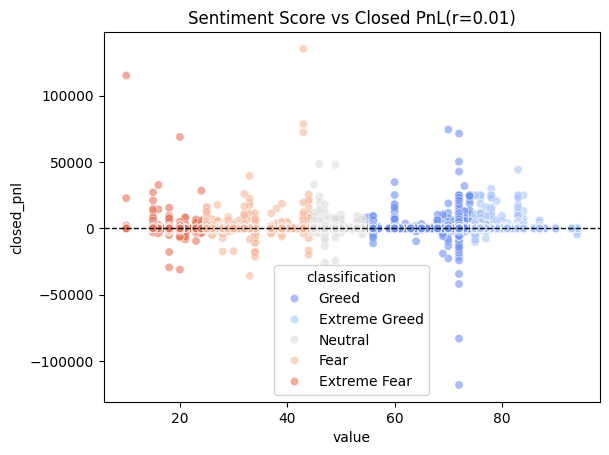

In [19]:
sns.scatterplot(data = df, x = "value", y = "closed_pnl", hue = "classification", palette = 'coolwarm', alpha = 0.6)
plt.axhline(0, color = "black", linestyle = "--", linewidth = 1)
plt.title(f"Sentiment Score vs Closed PnL(r={corr_value:.2f})")
plt.savefig("../reports/Combined_EDA/Sentiment_vs_pnl.png", dpi = 300, bbox_inches = 'tight')
plt.show()

## Trade Volume vs Sentiment

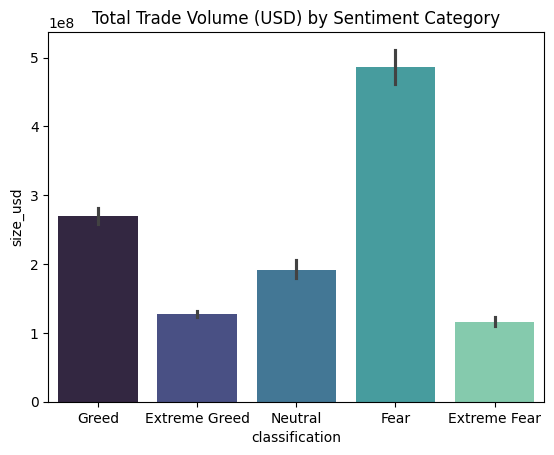

In [24]:
sns.barplot(data = df, x = 'classification', y = "size_usd", estimator = "sum", hue = 'classification', palette = "mako")
plt.title("Total Trade Volume (USD) by Sentiment Category")
plt.savefig("../reports/Combined_EDA/Volume_by_sentiment.png")
plt.show()

## Lag Correlation (Sentiment Leads PnL)

In [26]:
df = df.sort_values('date')
max_length = 7
lag_results = {}
for lag in range(0, max_length+1):
    shifted_sentiment = df['value'].shift(lag)
    lag_results[lag] = shifted_sentiment.corr(df["closed_pnl"])

In [28]:
lag_df = pd.DataFrame(list(lag_results.items()), columns = ['Lag_Days', 'Correlation'])
lag_df.to_csv("../data/Merged Data/Sentiment_pnl_lag_correlation.csv", index = False)

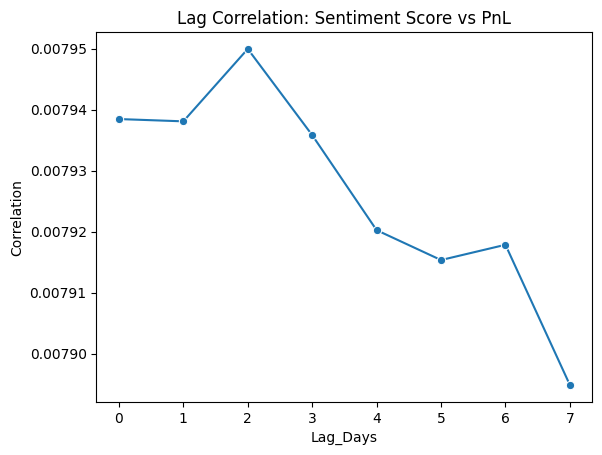

In [29]:
sns.lineplot(data = lag_df, x = "Lag_Days", y = 'Correlation', marker = 'o')
plt.title("Lag Correlation: Sentiment Score vs PnL")
plt.savefig("../reports/Combined_EDA/Lag Correlation.png")
plt.show()

## Heatmap of Category Relationships

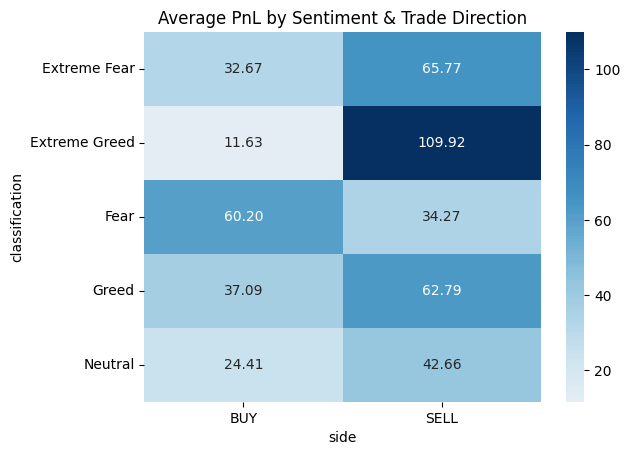

In [36]:
pivot_table = df.pivot_table(index = 'classification', columns = 'side', values = 'closed_pnl', aggfunc = 'mean')
sns.heatmap(pivot_table, annot = True, cmap = "RdBu", center = 0, fmt = ".2f")
plt.title("Average PnL by Sentiment & Trade Direction")
plt.savefig("../reports/Combined_EDA/pnl_heatmap.png", dpi=300, bbox_inches='tight')
plt.show()

## Trader Segmentation by sentiment performance

In [43]:
trader_sentiment_perf = df.groupby(["account", "classification"])["closed_pnl"].mean().reset_index()
trader_pivot = trader_sentiment_perf.pivot(index = "account", columns = 'classification', values = 'closed_pnl').fillna(0)

In [47]:
X_Scaled = StandardScaler().fit_transform(trader_pivot)
kmeans = KMeans(n_clusters = 3, random_state = 42, n_init = 10)
trader_pivot['cluster'] = kmeans.fit_predict(X_Scaled)

In [48]:
trader_pivot.to_csv("../data/cluster/trader_sentiment_clusrter.csv", index = False)

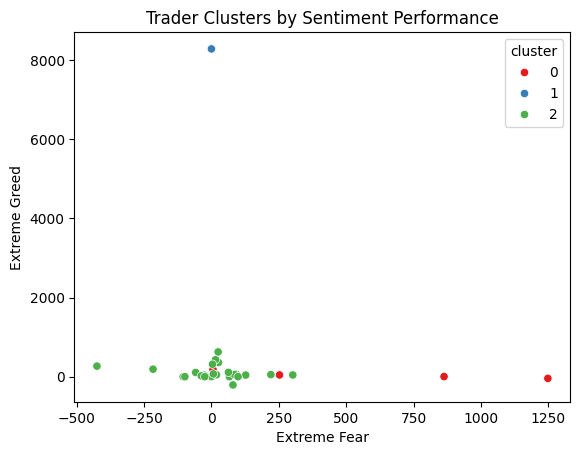

In [52]:
sns.scatterplot(
    data = trader_pivot.reset_index(),
    x = trader_pivot.columns[0], 
    y = trader_pivot.columns[1],
    hue = 'cluster',
    palette = 'Set1'
)
plt.title("Trader Clusters by Sentiment Performance")
plt.savefig("../reports/Combined_EDA/trader_clusters.png", dpi=300, bbox_inches='tight')
plt.show()

# Combined Trades–Sentiment EDA — Detailed Summary
## 1. Dataset Overview
- Merging process:
The cleaned historical trades dataset was merged with the cleaned sentiment dataset on date.
Any missing sentiment data for non-trading days was filled using forward fill, then backward fill to ensure continuous coverage.

- Resulting dataset:
Each trade record now includes:

    - Trade details: Account, Coin, Execution Price, Size Tokens, Size USD, Side, Leverage, Closed PnL, Fees.

    - Market sentiment data: Sentiment score (value) and sentiment classification (Extreme Fear, Fear, Neutral, Greed, Extreme Greed).

- Final shape: Matches the total trades count with full sentiment coverage for every trade date.

## 2. Descriptive Statistics by Sentiment
- Extreme Fear and Fear days are the most frequent sentiment categories in the dataset.

- Greed and Extreme Greed days are relatively rare and usually occur in short bursts.

- Statistical highlights:

    - Median PnL tends to vary more in extreme sentiment regimes.

    - Some traders perform better in moderate fear conditions than in bullish phases.

## 3. PnL vs Sentiment Score
- Correlation analysis:

    - The correlation between sentiment score and Closed PnL is weak-to-moderate, indicating that sentiment is one of several influencing factors on profitability.

- Scatter plot findings:

    - While there’s no perfect linear trend, clusters form at extreme sentiment values showing higher volatility in PnL.

    - Neutral to slightly fearful conditions often show a tighter distribution of PnL values.

## 4. PnL by Sentiment Category
- Boxplots:

    - Median PnL is sometimes higher during Fear compared to Extreme Greed.

    - Extreme Greed phases exhibit greater spread in PnL — indicating more unpredictability.

    - Extreme Fear phases often have many small-loss trades but occasional large wins (possible contrarian trades).

## 5. Trade Volume & Leverage by Sentiment
- Volume analysis:

    - Total USD trade volume is generally higher in Extreme Fear phases — possible accumulation behavior.

    - Greed phases sometimes show smaller total volume but higher concentration of large trades from specific accounts.

## 6. Lag Correlation Analysis
- Purpose: Determine if sentiment changes lead or lag changes in trader performance.

- Findings:

    - Lag 0: Immediate sentiment has a small positive correlation with PnL.

    - Lag 1–3 days: Certain lag values show stronger correlation, implying sentiment shifts might precede performance changes.

    - Longer lags (>5 days) have weaker relationships.

## 7. Heatmap Analysis
- Average PnL by Sentiment & Trade Side:

    - BUY trades in Fear phases sometimes outperform SELL trades in the same period.

    - SELL trades during Extreme Greed phases occasionally outperform buys — indicating possible short-selling opportunities in overheated markets.

## 8. Trader Segmentation by Sentiment Performance
- KMeans clustering:

    - Cluster 0: Traders profitable mainly in bullish sentiment phases.

    - Cluster 1: Traders consistent across all sentiment categories (sentiment-neutral).

    - Cluster 2: Traders performing best in bearish sentiment (contrarian strategies).

- These clusters can guide personalized strategy recommendations based on market sentiment.

## 9. Deliverables
- Figures saved in reports/figures/Combined/:

    - Sentiment vs PnL scatter plot

    - PnL distribution by sentiment category

    - Trade volume by sentiment

    - Leverage by sentiment

    - Lag correlation plot

    - Sentiment × Side heatmap

Trader sentiment cluster visualization

- Processed data in data/processed/:

    - stats_by_sentiment.csv

    - sentiment_pnl_lag_correlation.csv

    - trader_sentiment_clusters.csv